# ***Heart Disease***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn import svm

In [2]:
df = pd.read_csv("heart (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **Exploratory Data Analysis**

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Text(0.5, 1.0, 'Age-Cholesterol plot')

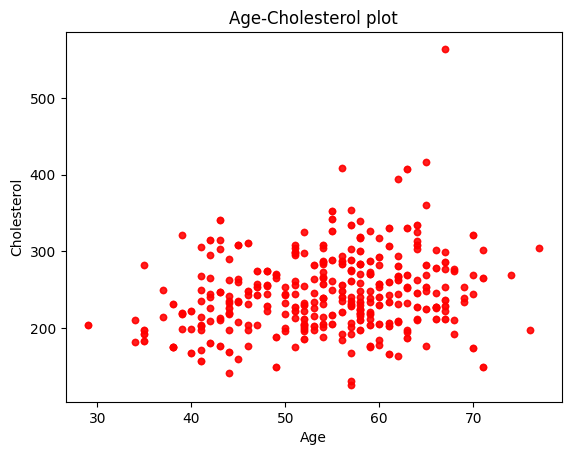

In [4]:
df.plot(kind='scatter',x='age',y='chol',alpha = 0.5, color= 'red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol plot')

In [5]:
X = df.drop(columns='target')
y = df.target

## **Data Spliting**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Model**

In [7]:
ml = svm.SVC()

param_grid = {
    'C': [1, 10, 100, 1000, 10000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

grid = GridSearchCV(ml, param_grid, refit=True, verbose=1, cv=15)

grid_search = grid.fit(X_train, y_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [8]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [9]:
accuracy = grid_search.best_score_ * 100
print("Accuracy for our training dataset with tuning: {:.2f}".format(accuracy))

Accuracy for our training dataset with tuning: 98.79


In [10]:
y_test_hat = grid.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning: {:.2f}".format(test_accuracy))

Accuracy for our testing dataset with tuning: 100.00


In [11]:
conf_matrix = confusion_matrix(y_test, y_test_hat)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=[True, False])

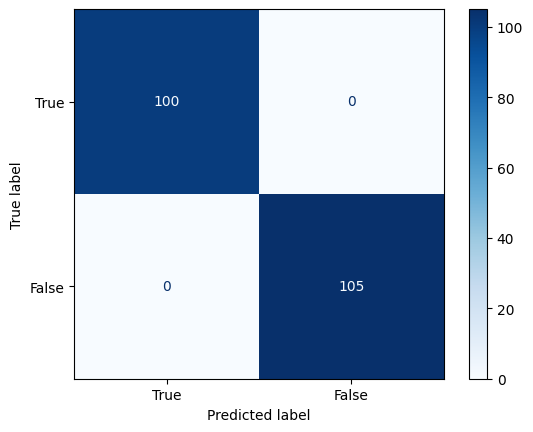

In [12]:
cm_display.plot(cmap='Blues')
plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_test_hat)
print(f'SVC Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_hat))
print('Classification Report:\n', classification_report(y_test, y_test_hat))

SVC Accuracy: 1.00
Confusion Matrix:
 [[100   0]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



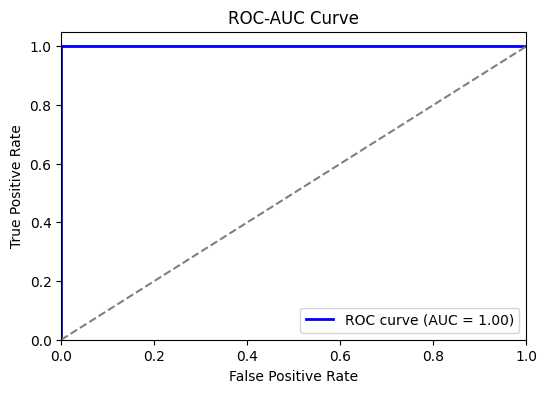

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_test_hat)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
roc_auc = roc_auc_score(y_test, y_test_hat)
print("ROC AUC Score", roc_auc)

ROC AUC Score 1.0
